# Домашнее задание 1. Генерация и фильтрация признаков

<center> <img src="https://ucarecdn.com/bf4c772d-b67a-42ae-a48b-cfd83910b0a2/" width=700>

## Задание 1. Генерация признаков из дополнительных датасетов (6 баллов)

<div class="alert alert-info">

1. Возьмите датасет `rides_info` с информацией о поездках и проведите группировку по каждой машине отдельно.

2. Для каждой машины (то есть для каждого `car_id`) подсчитайте несколько признаков:
  - минимальный рейтинг за все поездки;
  - средний рейтинг за все поездки;
  - общее количество километров, которое машина проехала;
  - максимальная скорость;
  - общее количество поездок для каждой машины.

3. Добавьте минимум 3 признака на свой выбор.

4. Сделайте соединение таблиц — вспомните про методы соединения и выберите подходящий для этого случая.

5. Подключите информацию про водителей (`driver_info`) и про ремонт машин (`fix_info`). Добавьте минимум 3 любых признака с каждого датасета.


<h4> Критерии оценивания </h4>
    
- Добавлены 5 обязательных и минимум 3 любых признака из датасета `rides_info` — 2 балла.
- Добавлены минимум 3 любых признака из датасета `driver_info` — 2 балла.
- Добавлены минимум 3 любых признака из датасета `fix_info` — 2 балла.

</div>

In [1]:
# Вызов библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rides_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv')
rides_info.head(1)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.24692,0,1.11526,2.909


In [3]:
fix_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv')
fix_info.head(1)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49


In [4]:
driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')
driver_info.head(1)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2


In [5]:
car_train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')
car_train.head(1)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug


## 1.Возьмите датасет rides_info с информацией о поездках и проведите группировку по каждой машине отдельно.
## 2.Для каждой машины (то есть для каждого car_id) подсчитайте несколько признаков:
- минимальный рейтинг за все поездки;
- средний рейтинг за все поездки;
- общее количество километров, которое машина проехала;
- максимальная скорость;
- общее количество поездок для каждой машины.

In [6]:
# Группировка по каждой машине и расчет статистик
grouped_rides = rides_info.groupby('car_id').agg(
    
    min_rating=('rating', 'min'),
    avg_rating=('rating', 'mean'),
    total_distance=('distance', 'sum'),
    max_speed=('speed_max', 'max'),
    total_rides=('ride_id', 'count')
).reset_index()

grouped_rides.head(1)

,car_id,min_rating,avg_rating,total_distance,max_speed,total_rides
0,A-1049127W,0.1,4.255172,1.125753e+07,179.729652,174


## 3. Добавьте минимум 3 признака на свой выбор

In [7]:
additional_features = rides_info.groupby('car_id').agg(
    avg_stop_times=('stop_times', 'mean'),
    refueling_percentage=('refueling', lambda x: (x.sum() / len(x)) * 100),
    avg_deviation_normal=('deviation_normal', 'mean')
).reset_index()

# Объединяем
enhanced_grouped_rides = pd.merge(grouped_rides, additional_features, on='car_id')

enhanced_grouped_rides.head(1)

,car_id,min_rating,avg_rating,total_distance,max_speed,total_rides,avg_stop_times,refueling_percentage,avg_deviation_normal
0,A-1049127W,0.1,4.255172,1.125753e+07,179.729652,174,0.816092,0.0,-6.136672


- 1. Среднее количество остановок на поездку - это может указывать на стиль вождения или типы маршрутов, которые выбирает водитель.
- 2. Процент поездок с дозаправкой - это может дать представление о дальности поездок или о необходимости в частых дозаправках, что может быть связано с эффективностью использования топлива.
- 3. Среднее отклонение от нормы - это может показывать, насколько типичны поездки для данной машины по сравнению с общим распределением, указывая на возможные аномалии или особенности использования.

# 4. Сделайте соединение таблиц — вспомните про методы соединения и выберите подходящий для этого случая.

In [8]:
# Используем merge для соединения car_train и enhanced_grouped_rides по car_id
full_car_info = pd.merge(car_train, enhanced_grouped_rides, on='car_id', how='left')

full_car_info.head(1)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,min_rating,avg_rating,total_distance,max_speed,total_rides,avg_stop_times,refueling_percentage,avg_deviation_normal
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,0.1,4.737759,1.214131e+07,180.855726,174,3.62069,0.0,-0.120391


## 5.Подключите информацию про водителей (driver_info) и про ремонт машин (fix_info).  Добавьте минимум 3 любых признака с каждого датасета

Я буду использовать метод merge() для объединения датасетов по соответствующим ключам. 


In [9]:
# Присоединяем rides_info к full_car_info по car_id
full_car_rides = pd.merge(full_car_info, rides_info, on='car_id', how='left')

# Присоединяем driver_info к full_car_rides по user_id
full_car_drivers = pd.merge(full_car_rides, driver_info[['user_id', 'age', 'user_rating', 'sex']], on='user_id', how='left')

# Присоединяем fix_info к full_car_drivers по car_id, выбирая нужные столбцы
final_df = pd.merge(full_car_drivers, fix_info[['car_id', 'fix_date', 'work_type', 'destroy_degree']], on='car_id', how='left', suffixes=('', '_fix'))

final_df.head(1)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,...,distance,refueling,user_ride_quality,deviation_normal,age,user_rating,sex,fix_date,work_type,destroy_degree
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,...,1682.556402,0,0.52475,0.0,38,7.4,0,2019-8-10 9:29,reparking,1.0


Метод был выбран с учётом необходимости объединения информации из различных источников для получения полной картины состояния автопарка, включая характеристики водителей и историю обслуживания каждого автомобиля. В данном случае, ключевой элемент связи — `rides_info`, который позволяет связать информацию о водителях `driver_info` и информацию о ремонтах `fix_info` с конкретными автомобилями `full_car_info` через поездки. Выбор такого подхода направлен на создание основы для комплексного анализа, который может включать изучение взаимосвязи между характеристиками водителя и состоянием автомобиля, анализ влияния ремонтов на общую оценку автомобилей, и др. аспекты, важные для управления автопарком и повышения качества обслуживания клиентов.

Из `driver_info` выбраны колонки: `age`, `user_rating`, `sex`

- `age`: Возраст водителя может быть важным фактором, влияющим на стиль вождения, опыт и, потенциально, на безопасность поездок.
- `user_rating`: Рейтинг водителя напрямую отражает удовлетворенность клиентов услугами водителя. Это ключевой показатель качества сервиса.
- `sex`: Предполагаю, что пол водителя включён в анализ, возможно, для исследования статистических различий в показателях вождения или предпочтениях клиентов.

Из `fix_info`выбраны колонки: `fix_date`, `work_type`, `destroy_degree`

`fix_date`: Дата последнего ремонта может помочь оценить текущее техническое состояние автомобиля и планировать будущее обслуживание.
`work_type`: Тип проведённых работ дает понимание о характере вмешательства в автомобиль, будь то регулярное техобслуживание или устранение неисправности.
`destroy_degree`: Степень повреждения автомобиля при последнем ремонте может указывать на серьёзность происшествий или износа, с которыми автомобиль сталкивался в прошлом.

## Задание 2. Применение методов фильтрации признаков (4 балла)

<center> <img src="https://ucarecdn.com/d1b4bc78-fd04-44fb-bdbf-0a63355b7384/" width=700>

<div class="alert alert-info">
    
1. Выберите и примените любые 3 (можно и больше) метода фильтрации, которые указаны выше или в ноутбуке по фильтрации из полезных ссылок.
    
2. Проинтерпретируйте результаты и сделайте выводы.


<h4> Критерии оценивания </h4>
    
- Применены методы фильтрации — 1 балл за каждый метод, максимум 3 балла.
- Сделаны выводы на основе примененных методов —1 балл.
    
<b>Что удалить сразу:</b>
    
- константы;
- уникальные значения (в том числе в тесте; как правило, это ID-шники по типу `car_id`).
    
<b>Какие методы использовать:</b>
    
- `Линейная корреляция`.
- `Phik` — тоже корреляция, но на стероидах ([туториал на Medium](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)).
- `Permutation importance` (из `scikit-learn`).
- `SHAP values` (из библиотеки `shap`).
- `CatBoost Feature Selection` (рекурсивные методы).

</div>

In [10]:
#!pip install catboost shap -q

In [11]:
# Сразу дропаем 
# - константы;
# - уникальные значения (в том числе в тесте; как правило, это ID-шники по типу car_id).

## Определение столбцов с константными значениями
constant_columns = [col for col in final_df.columns if final_df[col].nunique() == 1]

# Определение столбцов с уникальными значениями (исключая NaN)
unique_value_columns = [col for col in final_df.columns if final_df[col].nunique() == final_df.shape[0]]

# Уникальные значения
id_columns = ['user_id', 'car_id', 'ride_id']

# Объединение списков столбцов для удаления
columns_to_drop = list(set(constant_columns + unique_value_columns + id_columns))

# Удаление столбцов из final_df
final_df_cleaned = final_df.drop(columns=columns_to_drop)

print(f"Удалены столбцы: {columns_to_drop}")

Удалены столбцы: ['car_id', 'ride_id', 'total_rides', 'user_id']


In [12]:
# final_df_cleaned['ride_date'] = pd.to_datetime(final_df_cleaned['ride_date'], errors='coerce')
# final_df_cleaned['fix_date'] = pd.to_datetime(final_df_cleaned['fix_date'], errors='coerce')

In [13]:
pd.set_option('display.max_columns', None)
final_df_cleaned.head(1)

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,min_rating,avg_rating,total_distance,max_speed,avg_stop_times,refueling_percentage,avg_deviation_normal,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,age,user_rating,sex,fix_date,work_type,destroy_degree
0,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,0.1,4.737759,1.214131e+07,180.855726,3.62069,0.0,-0.120391,2020-01-01,5.72,220,3514,42,NaN,6,1682.556402,0,0.52475,0.0,38,7.4,0,2019-8-10 9:29,reparking,1.0


**Выберите и примените любые 3 (можно и больше) метода фильтрации, которые указаны выше или в ноутбуке по фильтрации из полезных ссылок.**

### Способ № 1 Feature importance (CatBoost)

In [14]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Подготовка данных
X = final_df_cleaned.drop(['target_reg'], axis=1, errors='ignore')  # Удаляем только целевую переменную
y = final_df_cleaned['target_reg'].fillna(0)

# Ваши категориальные колонки
cat_features = ['model', 'car_type', 'fuel_type', 'target_class', 'ride_date', 'fix_date', 'work_type']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Создание объектов Pool
pool_train = Pool(X_train, y_train, cat_features=cat_features)
pool_test = Pool(X_test, y_test, cat_features=cat_features)

# Инициализация и обучение модели CatBoost
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=10,
    cat_features=cat_features,
    verbose=100,
    early_stopping_rounds=100,
    random_seed=42
)

model.fit(pool_train, eval_set=pool_test, use_best_model=True)

# Вывод важности признаков
feature_importances = model.get_feature_importance()
importance_df = pd.DataFrame(feature_importances, index=X_train.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
importance_df

0:	learn: 16.2330212	test: 16.2397590	best: 16.2397590 (0)	total: 1.32s	remaining: 2m 10s
99:	learn: 2.9225192	test: 2.9314333	best: 2.9314333 (99)	total: 1m 28s	remaining: 0us

bestTest = 2.931433328
bestIteration = 99



,Importance
target_class,22.520021
avg_stop_times,16.693846
total_distance,8.504284
car_rating,6.528463
avg_deviation_normal,6.413973
riders,6.381172
max_speed,5.813413
avg_rating,5.743672
fix_date,5.534976
model,4.866480


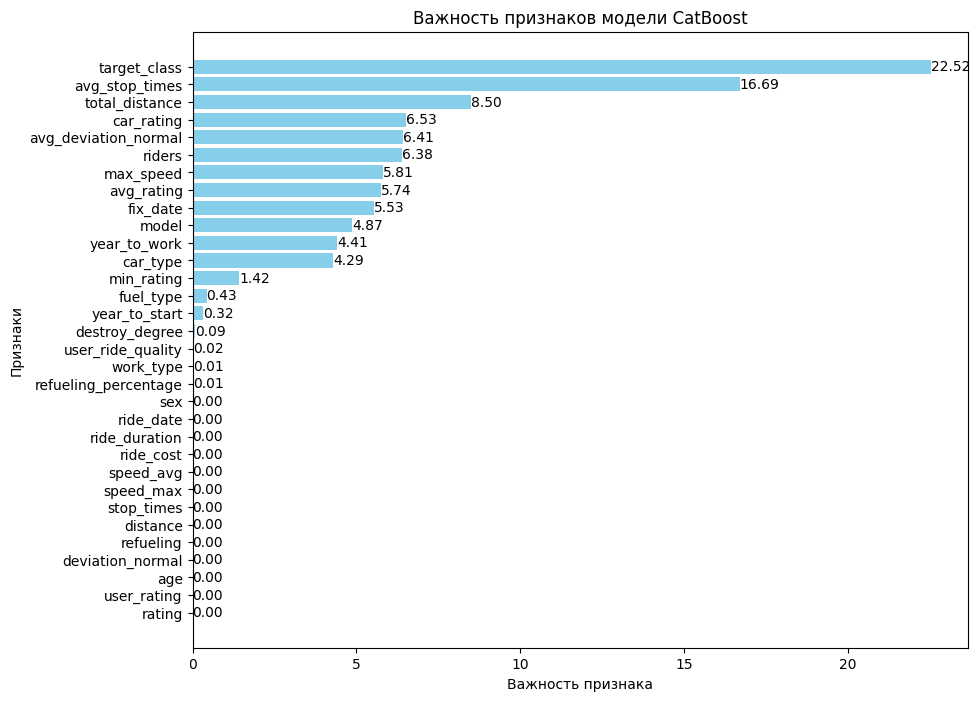

In [16]:
# Сортировка значений важности признаков по убыванию
importance_df_sorted = importance_df.sort_values(by="Importance", ascending=True)

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df_sorted.index, importance_df_sorted['Importance'], color='skyblue')

# Добавление значений на диаграмме
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", 
             va='center', ha='left')

plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков модели CatBoost')
plt.show()

### Способ № 2 Phink

In [17]:
# !pip install phik -q

In [22]:
import phik
from phik import resources, report
import seaborn as sns

# Вычисляем корреляцию Phik 
phik_matrix = final_df_cleaned.phik_matrix()

# Отображение корреляционной матрицы Phik
print(phik_matrix)

# Визуализация корреляционной матрицы 
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Phik Correlation Matrix")
plt.show()

interval columns not set, guessing: ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg', 'min_rating', 'avg_rating', 'total_distance', 'max_speed', 'avg_stop_times', 'refueling_percentage', 'avg_deviation_normal', 'rating', 'ride_duration', 'ride_cost', 'speed_avg', 'speed_max', 'stop_times', 'distance', 'refueling', 'user_ride_quality', 'deviation_normal', 'age', 'user_rating', 'sex', 'destroy_degree']


The number of unique values of variable fix_date is large: 77964. Are you sure this is not an interval variable? Analysis for pairs of variables including fix_date can be slow.


KeyboardInterrupt: 

‪![ошибка](1.jpg)
Способ мне не понравился, т.к., на мой взгляд, он пораждает различного рода проблемы, основной из которых является необходимость решить что-то с колонкой `fix_date`. Самым разумным представляется использовать какие-то конкретные данные из нее, например день или время поломки, а не всю дату целиком. Можно еще и дропнуть ее, но в таком случае, мы можем потерять потенциальный признак, который может быть важным для нашего анализа. Чтобы выполнить задание и не терять время, я дропнул эту колонку, но на самом деле, не будь это частью задания и будь у меня больше времени на исследование, я бы так не поступил!!!

In [ ]:
import phik
from phik import resources, report
import seaborn as sns

# Дропаю 'fix_date'
final_df_drop = final_df_cleaned.drop(columns=['fix_date'])

# Вычисляем корреляцию Phik 
phik_matrix = final_df_drop.phik_matrix()

# Отображение корреляционной матрицы Phik
print(phik_matrix)

# Визуализация корреляционной матрицы 
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Phik Correlation Matrix")
plt.show()

interval columns not set, guessing: ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg', 'min_rating', 'avg_rating', 'total_distance', 'max_speed', 'avg_stop_times', 'refueling_percentage', 'avg_deviation_normal', 'rating', 'ride_duration', 'ride_cost', 'speed_avg', 'speed_max', 'stop_times', 'distance', 'refueling', 'user_ride_quality', 'deviation_normal', 'age', 'user_rating', 'sex', 'destroy_degree']


### Способ № 3 ...

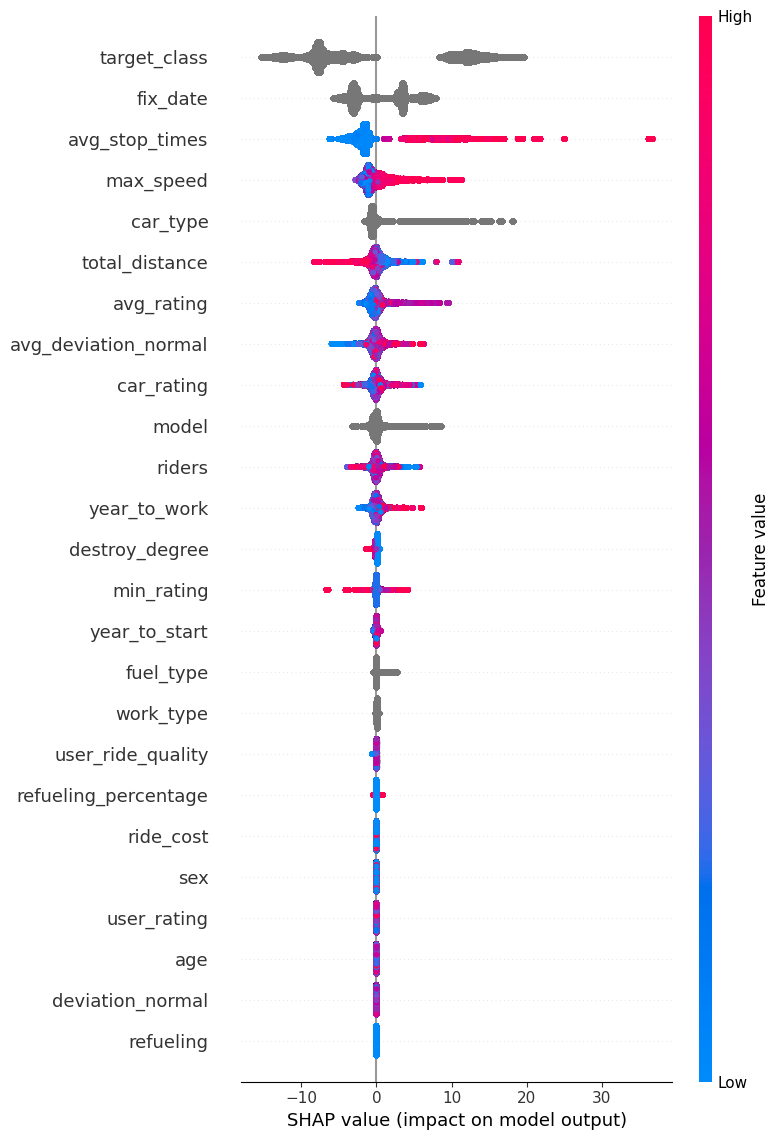

In [21]:
import shap
# Создание объекта TreeExplainer с использованием вашей обученной модели CatBoost
explainer = shap.TreeExplainer(model)

# Вычисление SHAP values для тестового набора данных
shap_values = explainer.shap_values(pool_test)

# Визуализация средней абсолютной величины значений SHAP для каждого признака
shap.summary_plot(shap_values, X_test, max_display=25)